In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import gmaps
import gmaps.datasets

# Study data files
food_data = "FAO.csv"

In [102]:
# Read the food data and the study results
food_data = pd.read_csv(food_data, encoding='latin-1')

In [103]:
#view the data for food_data
food_data.head(10)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
5,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,AFG,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,AFG,2,Afghanistan,2520,"Cereals, Other",5142,Food,1000 tonnes,33.94,67.71,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
8,AFG,2,Afghanistan,2531,Potatoes and products,5142,Food,1000 tonnes,33.94,67.71,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230
9,AFG,2,Afghanistan,2536,Sugar cane,5521,Feed,1000 tonnes,33.94,67.71,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81


In [104]:
# Produced DF
produced = food_data.loc[food_data["Element"] == "Food"].drop(["Unit","Area Abbreviation","Area Code","Item Code","Element Code"], axis = 1)

produced.head(10)

,Area,Item,Element,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,33.94,67.71,183.0,183.0,182.0,220.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,Afghanistan,Barley and products,Food,33.94,67.71,237.0,237.0,237.0,238.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
5,Afghanistan,Maize and products,Food,33.94,67.71,403.0,403.0,410.0,415.0,415.0,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,Afghanistan,Millet and products,Food,33.94,67.71,17.0,18.0,19.0,20.0,21.0,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,Afghanistan,"Cereals, Other",Food,33.94,67.71,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
8,Afghanistan,Potatoes and products,Food,33.94,67.71,111.0,97.0,103.0,110.0,113.0,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230
11,Afghanistan,Sugar (Raw Equivalent),Food,33.94,67.71,45.0,41.0,43.0,52.0,55.0,...,124.0,152.0,169.0,192.0,217.0,231.0,240.0,240.0,250,255
12,Afghanistan,"Sweeteners, Other",Food,33.94,67.71,0.0,0.0,0.0,0.0,0.0,...,9.0,15.0,12.0,6.0,11.0,2.0,9.0,21.0,24,16
13,Afghanistan,Honey,Food,33.94,67.71,2.0,2.0,2.0,2.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2,2


In [105]:
# Produced DF
consumed = food_data.loc[food_data["Element"] == "Feed"].drop(["Unit","Area Abbreviation","Area Code","Item Code","Element Code"], axis = 1)

consumed.head(10)

,Area,Item,Element,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
2,Afghanistan,Barley and products,Feed,33.94,67.71,76.0,76.0,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
4,Afghanistan,Maize and products,Feed,33.94,67.71,210.0,210.0,214.0,216.0,216.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
9,Afghanistan,Sugar cane,Feed,33.94,67.71,45.0,45.0,45.0,45.0,31.0,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81
10,Afghanistan,Sugar beet,Feed,33.94,67.71,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
14,Afghanistan,"Pulses, Other and products",Feed,33.94,67.71,1.0,1.0,1.0,1.0,1.0,...,3.0,2.0,3.0,3.0,3.0,5.0,4.0,5.0,4,4
56,Afghanistan,Milk - Excluding Butter,Feed,33.94,67.71,28.0,28.0,32.0,32.0,36.0,...,121.0,117.0,112.0,116.0,113.0,115.0,114.0,114.0,121,123
60,Afghanistan,Cereals - Excluding Beer,Feed,33.94,67.71,286.0,286.0,290.0,292.0,292.0,...,178.0,444.0,495.0,512.0,477.0,574.0,493.0,394.0,567,560
63,Afghanistan,Sugar Crops,Feed,33.94,67.71,45.0,45.0,45.0,45.0,31.0,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81
65,Afghanistan,Pulses,Feed,33.94,67.71,1.0,1.0,1.0,1.0,1.0,...,3.0,2.0,3.0,3.0,3.0,5.0,4.0,5.0,4,4
79,Afghanistan,Milk - Excluding Butter,Feed,33.94,67.71,28.0,28.0,32.0,32.0,36.0,...,121.0,117.0,112.0,116.0,113.0,115.0,114.0,114.0,121,123


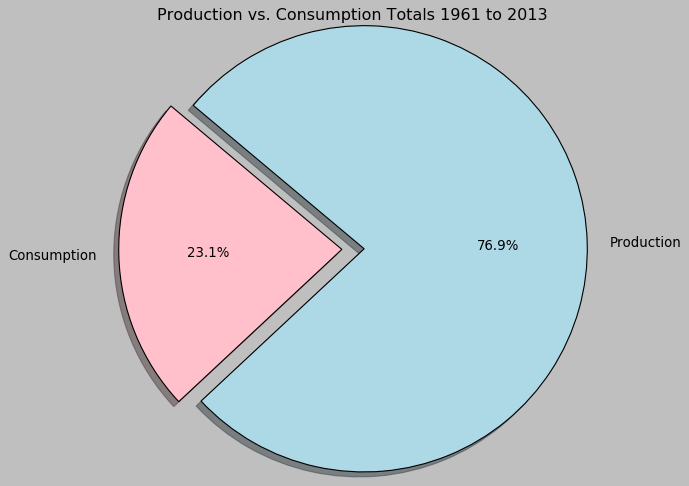

In [106]:
foo = food_data.groupby(["Element"]).agg("sum").drop(["Area Code","Item Code","Element Code","latitude","longitude"],axis=1)
foo = foo.sum(axis=1)
labels=["Consumption","Production"]
values=[foo[0],foo[1]]
plt.title("Production vs. Consumption Totals 1961 to 2013")

colors = ["pink","lightblue"]
explode = (0.1,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.savefig("../foodvsfeedpie.png")
plt.show()

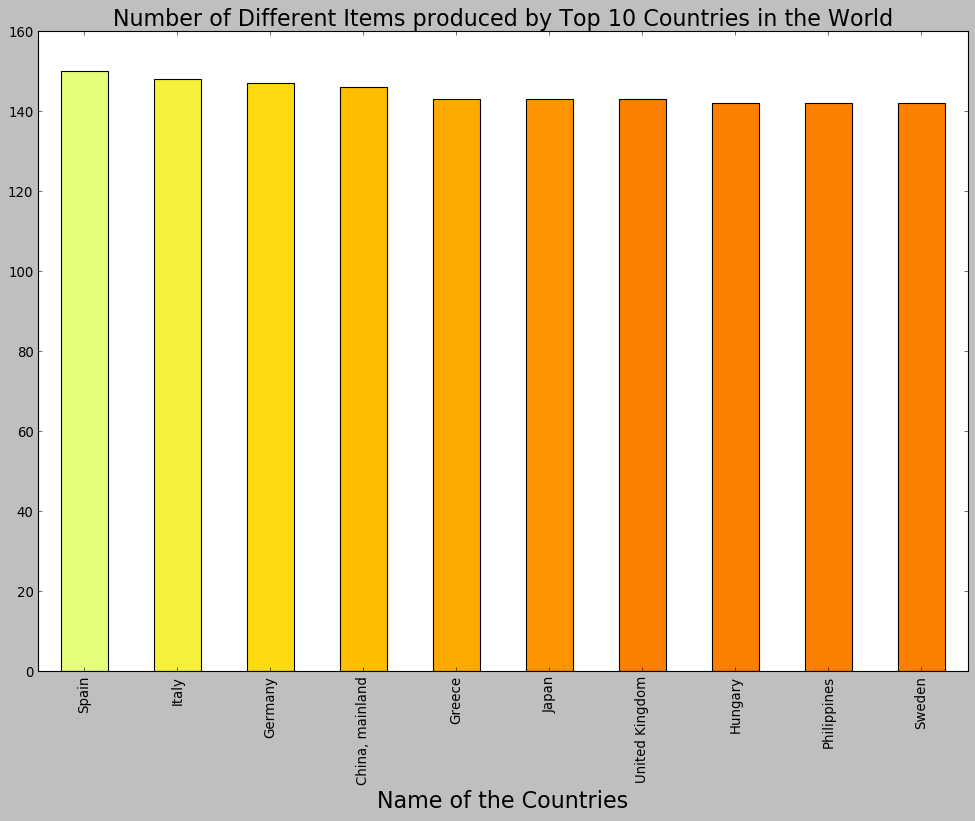

<Figure size 640x480 with 0 Axes>

In [107]:
# Number of different items produced by country
color = plt.cm.Wistia(np.linspace(0, 1.5, 10))
plt.style.use('_classic_test')
food_data['Area'].value_counts('Food' in 'Element').sort_values(ascending = False).head(10).plot.bar(figsize = (15, 10), color = color)
plt.title('Number of Different Items produced by Top 10 Countries in the World', fontsize = 20)
plt.xlabel('Name of the Countries', fontsize = 20)
plt.savefig("../diff_items_prod_by_country.png")
plt.show()
plt.tight_layout()

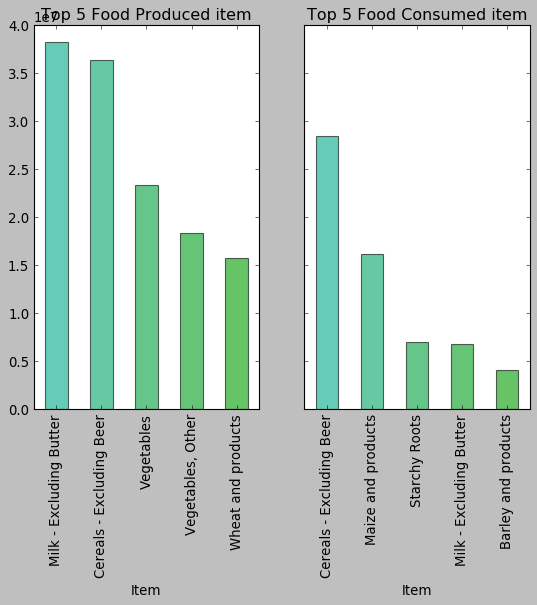

In [108]:
#Rank of most Produced Items 

from matplotlib import cm

year_list = list(food_data.iloc[:,10:].columns)
df_item = food_data.pivot_table(values=year_list, columns='Element',index=['Item'], aggfunc='sum')
df_item = df_item.T

color = cm.nipy_spectral(np.linspace(.4,.8, 30))

#FOOD
df_food_item = df_item.xs('Food', level=1, axis=0)
df_food_item = df_food_item.sum(axis=0).sort_values(ascending=False).head()
#FEED
df_feed_item = df_item.xs('Feed', level=1, axis=0)
df_feed_item = df_feed_item.sum(axis=0).sort_values(ascending=False).head()
#Plot
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.rcParams['figure.figsize'] =(15,7) 

df_food_item.plot(kind='bar', title='Top 5 Food Produced item', color=color, alpha=0.6, stacked=True, ax=ax1)
df_feed_item.plot(kind='bar', title='Top 5 Food Consumed item', color=color, alpha=0.6, stacked=True, ax=ax2)

plt.savefig("../TopFives.png")

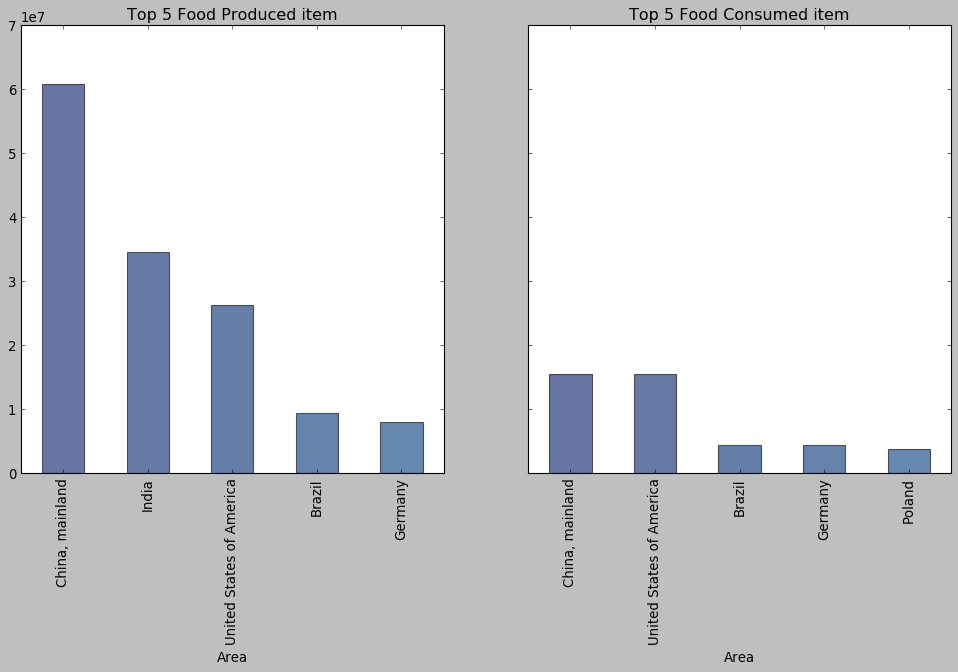

In [109]:
#Rank of most Produced Items 

from matplotlib import cm

year_list = list(food_data.iloc[:,10:].columns)
df_item = food_data.pivot_table(values=year_list, columns='Element',index=['Area'], aggfunc='sum')
df_item = df_item.T

color = cm.ocean(np.linspace(.4,.8, 20))


#FOOD
df_food_item = df_item.xs('Food', level=1, axis=0)
df_food_item = df_food_item.sum(axis=0).sort_values(ascending=False).head()
#FEED
df_feed_item = df_item.xs('Feed', level=1, axis=0)
df_feed_item = df_feed_item.sum(axis=0).sort_values(ascending=False).head()
#Plot
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.rcParams['figure.figsize'] =(10,7) 

df_food_item.plot(kind='bar', title='Top 5 Food Produced item', color=color, alpha=0.6, stacked=True, ax=ax1)
df_feed_item.plot(kind='bar', title='Top 5 Food Consumed item', color=color, alpha=0.6, stacked=True,  ax=ax2)

plt.savefig("../TopFives.png")

In [110]:
# Create a group based on the country
prod_country = produced.groupby(['Area'])

# Sum for all items produced each year
count_prod_country = prod_country.sum()

count_prod_country.head(10)

,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2477.62,4942.83,8761.0,8694.0,8458.0,9430.0,9753.0,9445.0,10501.0,10682.0,...,15838.0,16474.0,16975.0,17856.0,18087.0,19045.0,19642.0,19908.0,21184,21471
Albania,4032.70,1976.66,1612.0,1641.0,1643.0,1767.0,1789.0,1798.0,1844.0,1940.0,...,5647.0,5725.0,5864.0,5785.0,6093.0,6182.0,6573.0,6780.0,6909,6952
Algeria,2859.06,169.32,7405.0,7141.0,6798.0,7157.0,7425.0,7481.0,7912.0,8709.0,...,44044.0,45161.0,46468.0,45681.0,47480.0,52666.0,54267.0,58375.0,60816,63455
Angola,-1052.80,1679.78,4716.0,4657.0,5124.0,5154.0,5399.0,5549.0,5685.0,5537.0,...,15919.0,16882.0,18243.0,19765.0,21779.0,24465.0,25992.0,27455.0,27968,30121
Antigua and Barbuda,1774.24,-6427.20,90.0,92.0,103.0,93.0,82.0,73.0,64.0,57.0,...,92.0,113.0,108.0,122.0,115.0,114.0,115.0,118.0,113,119
Argentina,-3803.58,-6298.38,33850.0,33231.0,33692.0,34628.0,36863.0,36206.0,37590.0,39353.0,...,54026.0,57581.0,58116.0,59078.0,61350.0,60976.0,61534.0,63810.0,64614,65063
Armenia,3926.86,4413.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4299.0,4900.0,5266.0,5425.0,5537.0,5600.0,5114.0,5315.0,5787,5862
Australia,-2552.27,13511.78,17982.0,18636.0,19346.0,19754.0,20087.0,21249.0,21373.0,22142.0,...,36122.0,37879.0,38902.0,40055.0,40928.0,40711.0,42002.0,42294.0,42861,43975
Austria,4989.60,1527.75,13003.0,12820.0,13408.0,13499.0,13247.0,13484.0,13498.0,13638.0,...,16562.0,16808.0,16739.0,17104.0,17266.0,16971.0,17049.0,17739.0,17834,18167


In [111]:
# Create a group based on the country
eaten_country = consumed.groupby(['Area'])

# Sum for all items consumed each year
count_eaten_country = eaten_country.sum()

count_eaten_country.head(10)

,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,339.40,677.10,720.0,720.0,736.0,740.0,720.0,724.0,788.0,826.0,...,704.0,1184.0,1342.0,1392.0,1294.0,1616.0,1388.0,1192.0,1522,1536
Albania,1028.75,504.25,94.0,108.0,124.0,122.0,95.0,197.0,202.0,229.0,...,990.0,994.0,1047.0,959.0,1075.0,1134.0,1334.0,1334.0,1312,1319
Algeria,616.66,36.52,83.0,94.0,63.0,98.0,84.0,55.0,74.0,130.0,...,4575.0,4401.0,4599.0,4252.0,3436.0,4839.0,5804.0,7477.0,8549,8706
Angola,-168.00,268.05,118.0,118.0,116.0,132.0,128.0,128.0,148.0,148.0,...,9622.0,9814.0,10004.0,10112.0,10274.0,12520.0,12408.0,13118.0,10096,18518
Antigua and Barbuda,221.78,-803.40,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0
Argentina,-922.08,-1526.88,9552.0,7553.0,6527.0,7010.0,8073.0,10532.0,9847.0,11004.0,...,10532.0,14735.0,14030.0,15070.0,14589.0,7446.0,11508.0,14954.0,11332,15780
Armenia,1402.45,1576.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1216.0,1092.0,962.0,1328.0,1421.0,1224.0,794.0,1108.0,1191,1313
Australia,-682.29,3612.06,7813.0,8982.0,9556.0,9353.0,8874.0,9309.0,9070.0,9202.0,...,21884.0,25832.0,23662.0,22582.0,23510.0,19102.0,22924.0,19577.0,19094,18471
Austria,1615.68,494.70,9539.0,9807.0,10229.0,10600.0,9417.0,10301.0,10451.0,11456.0,...,7903.0,7658.0,7291.0,7327.0,8001.0,7760.0,7469.0,7705.0,6237,6823


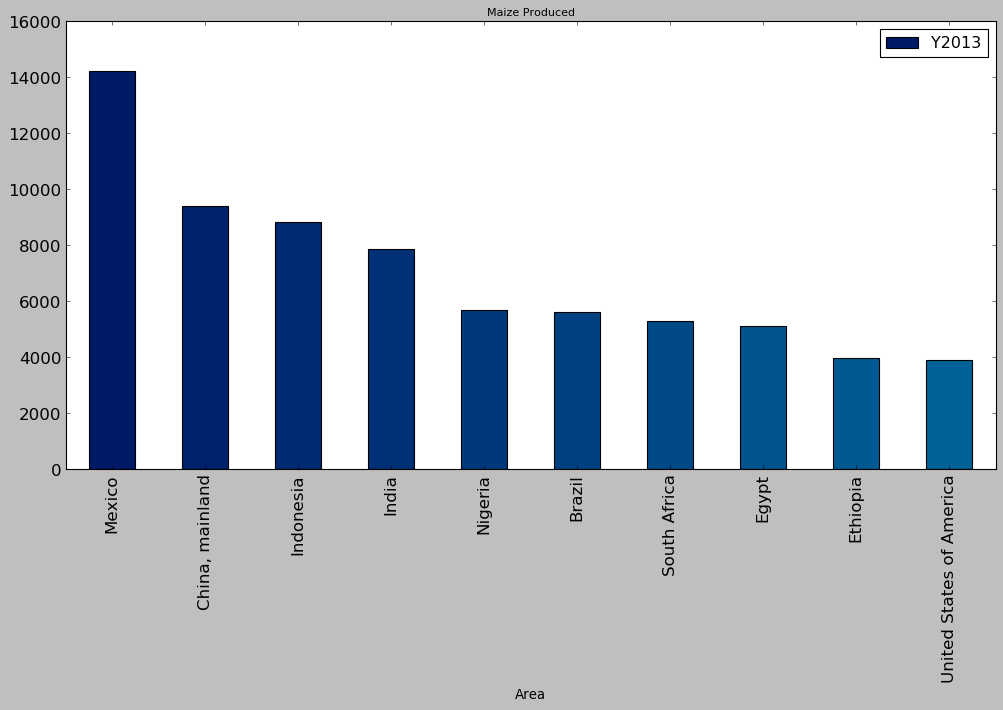

In [112]:
# Who are the top maize producers in the year 2013?
maize = produced[produced['Item'] == 'Maize and products'].sort_values('Y2013', ascending=False)
maize.head(n=10).plot.bar(x='Area', y='Y2013', figsize=(15, 7), fontsize=15, color=color, )
plt.title('Maize Produced', fontsize = 10)
plt.savefig("../Maizetoptenproduced.png")

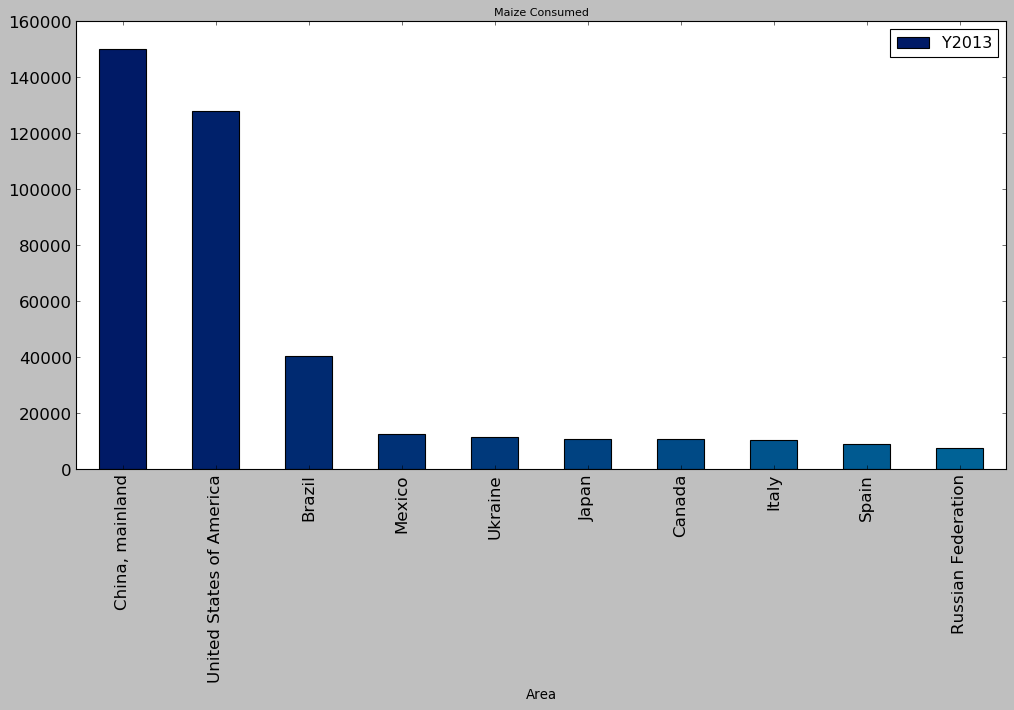

In [113]:
# Who are the top maize consumers in the year 2013?
maize = consumed[consumed['Item'] == 'Maize and products'].sort_values('Y2013', ascending=False)
maize.head(n=10).plot.bar(x='Area', y='Y2013', figsize=(15, 7), fontsize=15, color=color)
plt.title('Maize Consumed', fontsize = 10)
plt.savefig("../Maizetoptenconsumers.png")

In [114]:
# Store latitude and longitude in locations
consumed_maize = consumed.loc[consumed['Item']=='Maize and products']
locations = consumed_maize[["latitude", "longitude"]]

# Fill NaN values and convert to float
consumed_year = consumed_maize["Y2013"].astype(float)

In [115]:
# Plot Heatmap
fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=consumed_year, 
                                 dissipating=False, max_intensity=1,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

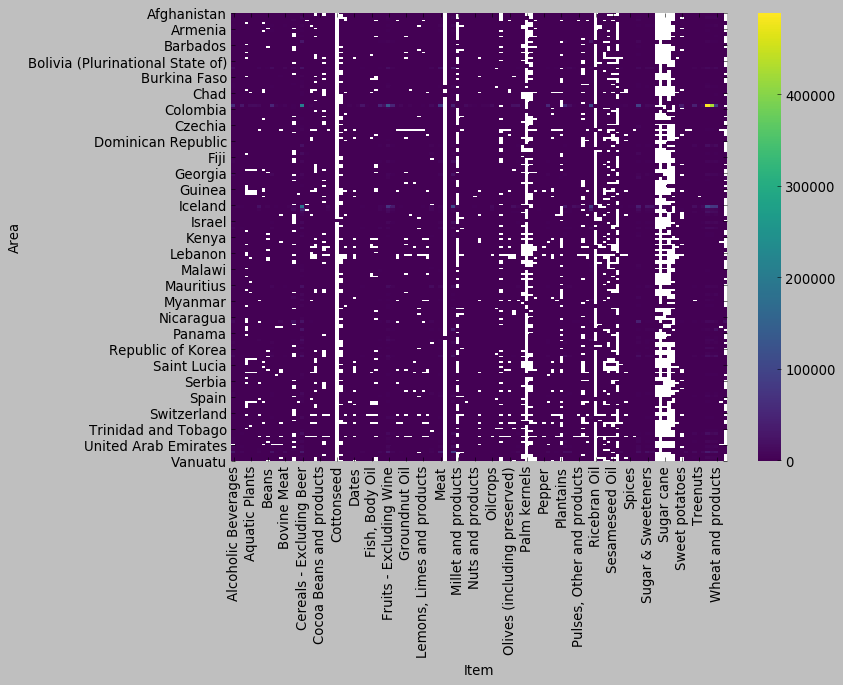

In [116]:
import seaborn as sns
df2 = produced[['Item','Area','Y2013']]
heatmap2_data = pd.pivot_table(df2,values='Y2013', index=['Area'], columns='Item')
heatmap2_data.head(n=10)
sns.heatmap(heatmap2_data, cmap="viridis")